<a href="https://colab.research.google.com/github/hakeemsyd/rag-pipeline-movies-reccomendation/blob/main/movierecommendation_with_haystack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://huggingface.co/spaces/hakeemsyd/moviesbot

In [ ]:
!pip install -q -U haystack-ai
!pip install -q -U huggingface_hub
!pip install -q -U datasets
!pip install -q -U astra-haystack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.5/319.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 2.9 MB/s eta 0:00:00
  Preparing metadata 

In [ ]:
import os
from google.colab import userdata
from datasets import load_dataset as ld
import pandas as pd
from haystack import Document
from haystack.components.embedders import OpenAIDocumentEmbedder
from haystack_integrations.document_stores.astra import AstraDocumentStore
from haystack.components.preprocessors import DocumentSplitter
import json

# setup
openai_api_key = userdata.get('OPENAI_API_KEY')
os.environ["OPENAI_API_KEY"] = openai_api_key
astra_token = userdata.get('ASTRA_DB_APPLICATION_TOKEN')
os.environ["ASTRA_DB_APPLICATION_TOKEN"] = astra_token

astra_api_endpoint = userdata.get('ASTRA_DB_API_ENDPOINT')
os.environ["ASTRA_DB_API_ENDPOINT"] = astra_api_endpoint

# load dataset from huggin faces
chunksize = 1000
overlap = 100

dataset = ld('ShubhamChoksi/IMDB_Movies')
df = pd.DataFrame(dataset['train'])

docs = []
splitter = DocumentSplitter(split_by="word", split_length=chunksize, split_overlap=overlap)
for _, row in df.iterrows():
    docs.append(Document(content=row.to_json()))

print(f'docs: {len(docs)}')
splitted_docs = splitter.run(docs)['documents']
print(f'splitted docs: {len(splitted_docs)}')

# since we are using persistent storage for embeddings. this is commented
# out.
# doc_embedder = OpenAIDocumentEmbedder()
# docs_with_embeddings = doc_embedder.run(splitted_docs)
document_store = AstraDocumentStore();
# document_store.write_documents(docs_with_embeddings['documents'])
# print(f'The doc store has {document_store.count_documents()} docuemnts')

docs: 6591
splitted docs: 6668


Calculating embeddings: 100%|██████████| 209/209 [01:56<00:00,  1.79it/s]
/usr/local/lib/python3.10/dist-packages/haystack_integrations/document_stores/astra/document_store.py:105: UserWarning: Collection 'documents' is detected as legacy and has indexing turned on for all fields. This implies stricter limitations on the amount of text each entry can store. Consider reindexing anew on a fresh collection to be able to store longer texts.
  self.index = AstraClient(


The doc store has 1000 docuemnts


resulting embedding is 
 {'embedding': [-0.018055379390716553, -0.01873696781694889, -0.01508847065269947, -0.025873586535453796, -0.022198360413312912, 0.03490795940160751, -0.027423864230513573, -0.022198360413312912, 0.00902100745588541, -0.012081468477845192, 0.014246510341763496, 0.02488461695611477, 0.002510847058147192, 0.003882374381646514, 0.003711977507919073, 0.010330724529922009, 0.03210142254829407, -0.00274973688647151, 0.02533900737762451, -0.0016530160792171955, 0.000305920751998201, 0.002888393122702837, -0.012736326083540916, -0.013130578212440014, -0.019766030833125114, -0.00018271716544404626, 0.01234875712543726, -0.029695820063352585, 0.0031857520807534456, -0.01281651295721531, 0.025860222056508064, -0.01455389242619276, -0.00870694313198328, -0.020273879170417786, -0.04054775834083557, -0.02469751425087452, 0.00706979725509882, -0.007537553086876869, 0.0019612337928265333, -0.013738660141825676, 0.027450591325759888, 0.009081147611141205, -0.0024774360936135054,

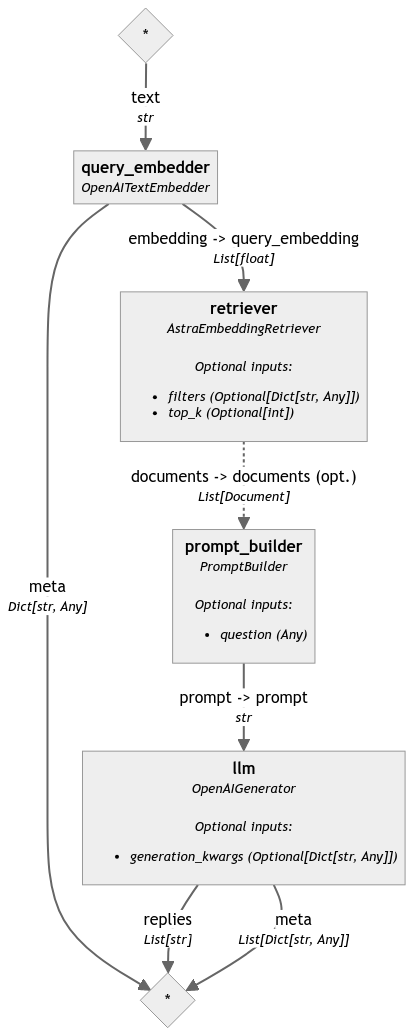

['Some good sci-fi movies from the 1980s include "Forbidden Planet," "Star Trek II: The Wrath of Khan," "Aliens," and "Blade Runner."']


In [ ]:
import os
from haystack import Pipeline, Document
from haystack_integrations.components.retrievers.astra import AstraEmbeddingRetriever
from haystack.components.generators import OpenAIGenerator
from haystack.components.embedders import OpenAITextEmbedder
from haystack.components.builders.prompt_builder import PromptBuilder

text_embedder = OpenAITextEmbedder()

# prompt
prompt_template = """
Given these documents, answer the question.
Documents:
{% for doc in documents %}
    {{ doc.content }}
{% endfor %}
Question: {{question}}
Answer:
"""

# create pipeline
rag_pipeline = Pipeline()


rag_pipeline.add_component("query_embedder", text_embedder)
rag_pipeline.add_component("retriever", AstraEmbeddingRetriever(document_store=document_store))
rag_pipeline.add_component("prompt_builder", PromptBuilder(template=prompt_template))
rag_pipeline.add_component("llm", OpenAIGenerator())

rag_pipeline.connect("query_embedder", "retriever.query_embedding")
rag_pipeline.connect("retriever.documents", "prompt_builder.documents")
rag_pipeline.connect("prompt_builder", "llm.prompt")


question = "What are some good sci-fi movies from 1980s?"

query_embedding = text_embedder.run('May')
print(f'resulting embedding is \n {query_embedding}')
results = rag_pipeline.run(
    {

        "query_embedder": {"text": question},
        "prompt_builder": {"question": question},
    }
)

rag_pipeline.show()

print(results["llm"]["replies"])


How easy is the library to set up and install?
Fairly easy however the breaking version change from 1.x to 2.x could be confusing.

What is the quality and completeness of the documentation?
Lots of amazing documentation on their website. I foudn it better then langchain.


Is the API well-designed, intuitive, and easy to learn?
Well documented and easy to pick up.

How active and supportive is the library's community?
Pretty active. I was blocked on a library issues where IDs of docs were beein duplicated. found the answer quickly.

Does the library offer flexibility and customization options?
yes, very composable and flexible.

How well does it integrate with your existing data and models?
it worked well.

Are all essential aspects of usage covered in the documentation?
documentation goes in many directions. its hard to piece out one single task.